# Preprocessing Data for scikit-learn: Mushroom Classification

## Introduction

In this project, we explore the famous UCI Mushroom Dataset, a collection that includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended for consumption. The dataset is well-known in the data science community for benchmarking classification models.

The objective of this analysis is to prepare the dataset for predictive modeling in scikit-learn, aiming to determine which attributes are the best predictors of whether a mushroom is poisonous or edible. This involves studying the dataset, preprocessing the data, and performing exploratory data analysis (EDA).

We will:
1. Study the dataset and its associated data dictionary.
2. Create a pandas DataFrame with a subset of the columns, focusing on the mushroom's edibility, its odor, and one additional attribute of our choosing.
3. Rename the columns to more descriptive names and convert categorical codes to numeric values, as required by scikit-learn.
4. Conduct exploratory data analysis to visualize the distribution of data and explore the relationships between features.

This notebook documents these steps and provides preliminary conclusions on the predictive capabilities of the selected features.

### Dataset Source:
The dataset can be accessed from the UCI Machine Learning Repository: [Mushroom Dataset at UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom).


## Extracting and Listing Dataset Files

To begin the analysis, we will extract the mushroom dataset from a compressed ZIP file and list its contents. This step ensures we understand the structure of the dataset and identify the key files necessary for our analysis, such as the data file and the data dictionary.


In [3]:
import zipfile
import os

# Defining the path to the zip file and the extraction target directory
zip_path = 'mushroom.zip'
extract_folder = 'mushroom_data'

# Creating a directory to extract the files
os.makedirs(extract_folder, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the files in the directory
extracted_files = os.listdir(extract_folder)
extracted_files


['agaricus-lepiota.names',
 'expanded.Z',
 'agaricus-lepiota.data',
 'README',
 'Index']

The output shows the list of extracted files, which includes crucial data files (`agaricus-lepiota.data`) and the data dictionary (`agaricus-lepiota.names`), among others. This initial exploration helps us determine the next steps in processing and analyzing the dataset.


## Reading the Data Dictionary

After identifying the necessary files, we focus on the `agaricus-lepiota.names` file, which serves as the data dictionary for the mushroom dataset. This file contains detailed descriptions of the features, their possible values, and some historical context and usage of the dataset. Understanding this information is key to effective data preprocessing and feature selection.


In [4]:
# Defining the path to the data dictionary file
names_path = os.path.join(extract_folder, 'agaricus-lepiota.names')

# Reading and displaying the contents of the data dictionary file
with open(names_path, 'r') as file:
    data_dictionary = file.read()

print(data_dictionary[:3000])  # Displays the first 3000 characters to avoid too much output


1. Title: Mushroom Database

2. Sources: 
    (a) Mushroom records drawn from The Audubon Society Field Guide to North
        American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred
        A. Knopf
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational
       Adjustment (Technical Report 87-19).  Doctoral disseration, Department
       of Information and Computer Science, University of California, Irvine.
       --- STAGGER: asymptoted to 95% classification accuracy after reviewing
           1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity
       and Coverage in Incremental Concept Learning. In Proceedings of 
       the 5th International Conference on Machine Learning, 73-79.
       Ann Arbor, Michigan: Morgan Kaufmann.  
       -- approximately the same results with their HILLARY algorithm    
    3. In 

The excerpt from the data dictionary reveals important historical usage of the dataset and outlines several logical rules that have been derived from the data in past research. These insights are valuable for setting benchmarks and expectations for our predictive models.


## Loading the Dataset into DataFrame

Now that we have identified the key dataset file (`agaricus-lepiota.data`), the next step is to load it into a pandas DataFrame. We will use predefined column names based on the descriptions provided in the data dictionary. This process will structure our raw data into a more accessible form, which is essential for effective analysis.


In [5]:
import pandas as pd

# Defining the path to the data file
data_path = os.path.join(extract_folder, 'agaricus-lepiota.data')

# Column names from data dictionary analysis (hardcoded as per .names description)
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Loading the data into a pandas DataFrame
data_df = pd.read_csv(data_path, header=None, names=column_names)

# Displaying the first few rows of the DataFrame
data_df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The DataFrame `data_df` displays the first few rows of the mushroom dataset. Each column represents a specific attribute of the mushrooms, such as cap shape, cap color, odor, etc., with the data organized in a structured format. This setup facilitates further data manipulation and analysis.


## Selecting and Renaming Relevant Columns

For the purposes of this analysis, we focus on a subset of columns that are most relevant to our study: the class of the mushroom (edible or poisonous), its odor, and spore print color. These features are chosen based on their potential predictive power for the classification task at hand. We also rename these columns to make them more intuitive and easier to reference in our analysis.


In [6]:
# Selecting the relevant columns and renaming them
selected_columns = {
    "class": "edible_poisonous",  # 'e' for edible, 'p' for poisonous
    "odor": "odor",
    "spore-print-color": "spore_print_color"
}
# Create a new DataFrame with the selected columns
mushrooms_subset = data_df[list(selected_columns.keys())].rename(columns=selected_columns)

# Display the first few rows of the new DataFrame
mushrooms_subset.head()


,edible_poisonous,odor,spore_print_color
0,p,p,k
1,e,a,n
2,e,l,n
3,p,p,k
4,e,n,n


Here, we see the new `mushrooms_subset` DataFrame that contains only the selected attributes: edible/poisonous status, odor, and spore print color, with the columns renamed for clarity. This subset is what we will use for our exploratory data analysis and further predictive modeling.


## Converting Categorical Data to Numeric Codes

To prepare our dataset for machine learning algorithms, we need to convert categorical data into numeric codes. This step is crucial as it allows our model to process and learn from the data effectively. We will convert the `edible_poisonous` column directly using a mapping, while `odor` and `spore_print_color` will be converted using pandas' categorical type conversion to ensure all categorical data is numerically encoded.


In [7]:
# Converting the categorical data to numeric codes
mushrooms_subset['edible_poisonous'] = mushrooms_subset['edible_poisonous'].map({'e': 0, 'p': 1})
mushrooms_subset['odor'] = mushrooms_subset['odor'].astype('category').cat.codes
mushrooms_subset['spore_print_color'] = mushrooms_subset['spore_print_color'].astype('category').cat.codes

# Displaying the first few rows of the DataFrame with numeric values
mushrooms_subset.head()


,edible_poisonous,odor,spore_print_color
0,1,6,2
1,0,0,3
2,0,3,3
3,1,6,2
4,0,5,3


The DataFrame now shows the numeric encoding for the columns previously containing categorical data. Each unique category in the `odor` and `spore_print_color` columns has been replaced with a distinct numeric code, and the `edible_poisonous` column has been mapped to 0 (edible) and 1 (poisonous). This numeric representation is essential for the next steps in our data analysis and model training.


## Exploratory Data Analysis: Visualizing Data Distribution

To better understand the distribution of our key features, we will visualize the data using histograms. These plots will show us the frequency of each category within the `edible_poisonous`, `odor`, and `spore_print_color` columns. Observing these distributions can help us identify patterns and potential biases in the dataset, which are critical for informed model building.


<ipython-input-8-5e13f540522d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['Edible (0)', 'Poisonous (1)'])


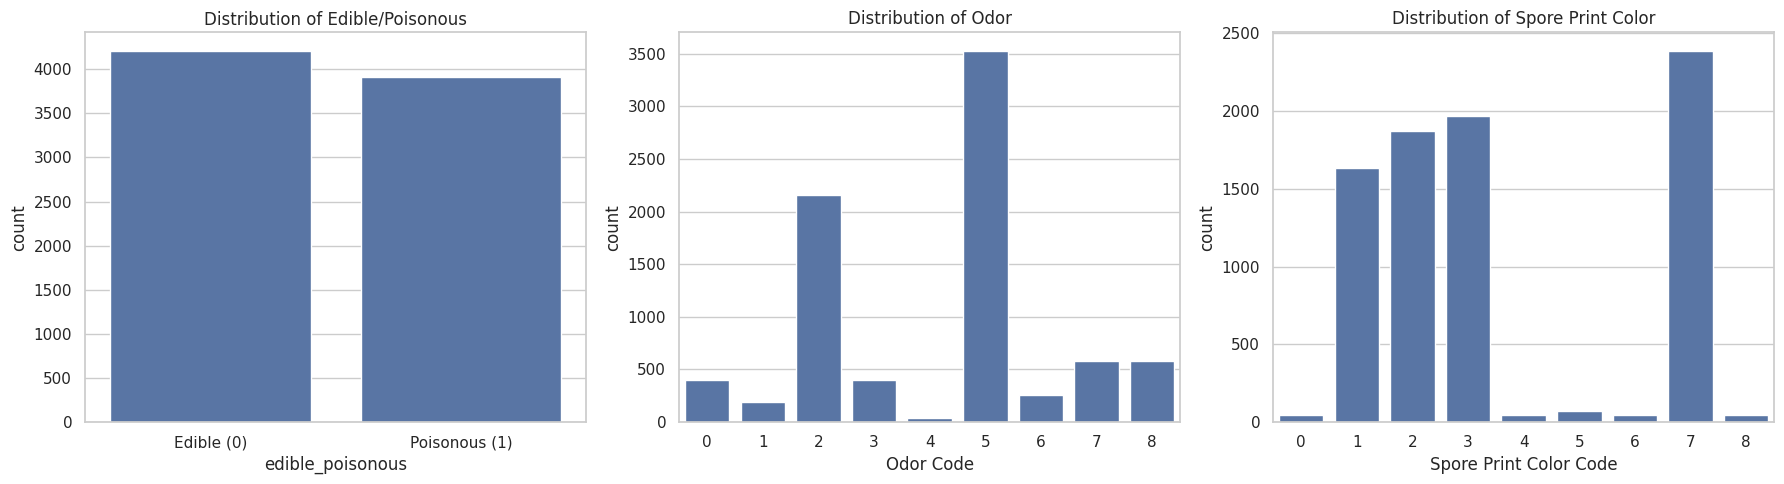

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the distribution of the 'edible_poisonous' feature
sns.countplot(ax=axes[0], x=mushrooms_subset['edible_poisonous'])
axes[0].set_title('Distribution of Edible/Poisonous')
axes[0].set_xticklabels(['Edible (0)', 'Poisonous (1)'])

# Plot the distribution of the 'odor' feature
sns.countplot(ax=axes[1], x=mushrooms_subset['odor'])
axes[1].set_title('Distribution of Odor')
axes[1].set_xlabel('Odor Code')

# Plot the distribution of the 'spore_print_color' feature
sns.countplot(ax=axes[2], x=mushrooms_subset['spore_print_color'])
axes[2].set_title('Distribution of Spore Print Color')
axes[2].set_xlabel('Spore Print Color Code')

# Show the plots
plt.tight_layout()
plt.show()


The plots reveal several insights into the distribution of our selected features:
- **Edible/Poisonous**: There is a balanced distribution between edible and poisonous mushrooms, which is ideal for training unbiased classification models.
- **Odor**: The diversity in odor codes suggests varying frequencies, indicating that some odors are more common than others among the mushrooms in this dataset.
- **Spore Print Color**: Similar to odor, the spore print colors show varied frequencies, which might correlate with mushroom edibility or toxicity.

These visualizations are instrumental in our preliminary analysis, guiding the development of hypotheses about the relationships between these features and mushroom edibility.


## Scatterplot Analysis: Relationships Between Features

To further explore the relationships between our selected features and mushroom edibility, we will create scatterplots. These plots will visually assess the correlation between the mushroom's edibility/poisonous status and two key features: `odor` and `spore_print_color`. Such visualizations can help identify trends and potential interactions between the features, which are crucial for building predictive models.


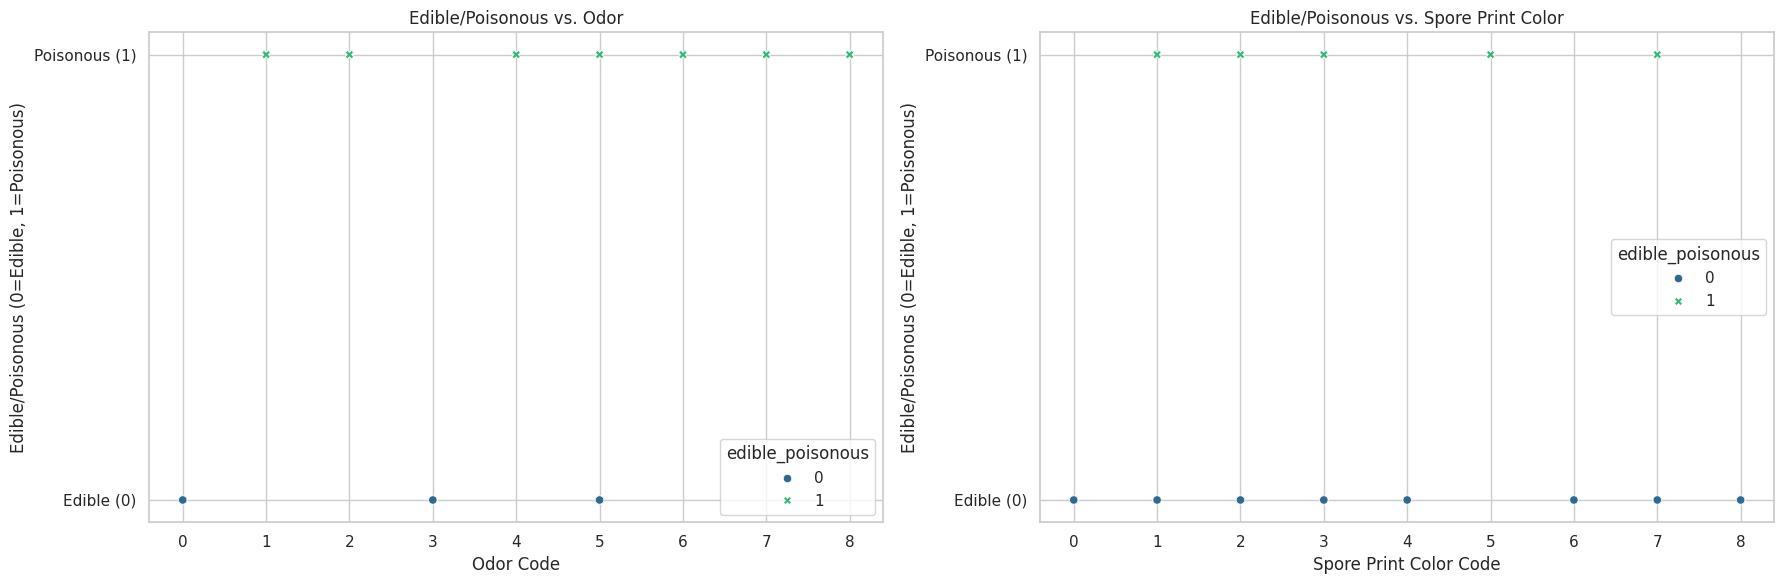

In [9]:
# Create scatterplots to visualize the relationship between edible/poisonous vs. odor and spore print color

# Set up the figure for the scatterplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatterplot for Edible/Poisonous vs. Odor
sns.scatterplot(ax=axes[0], x='odor', y='edible_poisonous', data=mushrooms_subset, hue='edible_poisonous', style='edible_poisonous', palette='viridis')
axes[0].set_title('Edible/Poisonous vs. Odor')
axes[0].set_ylabel('Edible/Poisonous (0=Edible, 1=Poisonous)')
axes[0].set_xlabel('Odor Code')
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['Edible (0)', 'Poisonous (1)'])

# Scatterplot for Edible/Poisonous vs. Spore Print Color
sns.scatterplot(ax=axes[1], x='spore_print_color', y='edible_poisonous', data=mushrooms_subset, hue='edible_poisonous', style='edible_poisonous', palette='viridis')
axes[1].set_title('Edible/Poisonous vs. Spore Print Color')
axes[1].set_ylabel('Edible/Poisonous (0=Edible, 1=Poisonous)')
axes[1].set_xlabel('Spore Print Color Code')
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['Edible (0)', 'Poisonous (1)'])

plt.tight_layout()
plt.show()


The scatterplots illustrate the relationship between the mushroom's edibility and the features of odor and spore print color:
- **Edible/Poisonous vs. Odor**: There is a noticeable pattern that certain odors are predominantly associated with either edible or poisonous mushrooms, suggesting a strong correlation that could be predictive.
- **Edible/Poisonous vs. Spore Print Color**: Similar to odor, certain spore print colors tend to correlate with whether mushrooms are edible or poisonous, indicating this feature's potential as a predictor in classification models.

These findings highlight the importance of these attributes in determining the edibility of mushrooms and will guide the feature selection for machine learning modeling.


## Conclusion and Next Steps

This analysis has demonstrated the potential of `odor` and `spore_print_color` as predictive features for determining whether a mushroom is edible or poisonous. Both features showed distinct patterns correlating with the edibility status, which can be exploited by classification models.

Our exploratory data analysis has laid a strong foundation for the next steps, which will involve developing a machine learning model using scikit-learn to predict mushroom edibility based on these features. This model will be designed to improve decision-making and enhance understanding of mushroom characteristics.

## Assignment Recap

This notebook fulfills the requirements of the preprocessing assignment for our scikit-learn project. We have successfully studied and transformed the data, prepared it for analysis, and conducted preliminary explorations to identify potentially predictive features. The insights gained here will inform our approach to the upcoming predictive analysis in Project 4, aiming to answer the question of which attributes best predict a mushroom's edibility.

### References

1. The UCI Machine Learning Repository's Mushroom Dataset page: [Mushroom Dataset at UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom).

